In [1]:
!wget https://raw.githubusercontent.com/ygtxr1997/CelebBasis/main/infer_images/wiki_names.txt

--2023-09-22 19:27:11--  https://raw.githubusercontent.com/ygtxr1997/CelebBasis/main/infer_images/wiki_names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15886 (16K) [text/plain]
Saving to: ‘wiki_names.txt’

wiki_names.txt      100%[===================>]  15.51K  --.-KB/s    in 0s      

2023-09-22 19:27:11 (46.4 MB/s) - ‘wiki_names.txt’ saved [15886/15886]



In [2]:
!wget https://raw.githubusercontent.com/ygtxr1997/CelebBasis/main/infer_images/celebs.txt

--2023-09-22 19:27:16--  https://raw.githubusercontent.com/ygtxr1997/CelebBasis/main/infer_images/celebs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1528 (1.5K) [text/plain]
Saving to: ‘celebs.txt’

celebs.txt          100%[===================>]   1.49K  --.-KB/s    in 0s      

2023-09-22 19:27:16 (14.3 MB/s) - ‘celebs.txt’ saved [1528/1528]



In [6]:
from pathlib import Path

#with Path('wiki_names.txt').open() as f:
with Path('celebs.txt').open() as f:
    wiki_names = f.read().split('\n')

len(wiki_names) # 1109

first_names = [n for n in set([name.split(' ')[0] for name in wiki_names]) if '.' not in n]
last_names = [n for n in set([name.split(' ')[-1] for name in wiki_names]) if '.' not in n]

len(first_names), len(last_names)

(107, 110)

In [7]:
first_names[:10]

['Brad',
 'Michael',
 'Jerry',
 'Kylie',
 'Britney',
 'Mindy',
 'Elton',
 'Howard',
 'Julia',
 'Roger']

In [8]:
last_names[:10]

['Jade',
 'Morita',
 'Ruhian',
 'Winfrey',
 'McCartney',
 'Cowell',
 'Daheley',
 'Cruise',
 'Jenner',
 'John']

In [9]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionPipeline.from_pretrained(
                model_id,
                revision="fp16",
                #torch_dtype=torch.float16,
                #use_auth_token=True
            ).to('cuda')

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/dmarx/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [10]:
kwargs = dict(
    num_inference_steps=25,
    num_images_per_prompt=4
)
prompt = "a painting of an apple"
outv = pipe(prompt, **kwargs)

  0%|          | 0/25 [00:00<?, ?it/s]

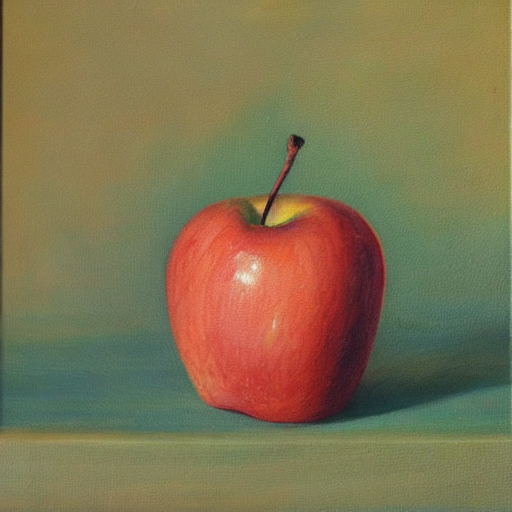

In [11]:
outv.images[0]

In [12]:
# 1. loop over names
# 2. create folder for names
# 3. generate images, save to folder
# 4. compute CLIP/DINO image embeddings, save to folder

# ---

# let's start with 10 names and prototype this procedure generally.
# an important hyper parameter to start with will be the number of images per name.
# let's start by generating an unnecessary number of images for this first group, say 20-100.
# then use these to compute our diversity measures, and calibrate how many images we need by how many images it generally takes to get this measure to converge.


In [13]:
names = ["david"] ## TODO: dev

root = Path("images")

for name in names:
    prompt = name
    prompt = prompt.lower().strip()
    outdir = root / prompt.replace(' ','_')
    outdir.mkdir(parents=True, exist_ok=True)